In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import viz

import sklearn.model_selection
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

import wrangle
import split_scale
import features

## Acquire and Prep

In [2]:
df = pd.read_csv('student_grades.csv')

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [5]:
# replace empty space with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [6]:
# drop NaN's and convert all columns to numeric
df = df.dropna().astype('int64')

In [7]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


# Exercises

We will be predicting the final grade using the exam scores. Our baseline is the simple mean of the final grade.

- Split the data into train and test datasets.

In [8]:
train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=7)

In [9]:
train.head()

,student_id,exam1,exam2,exam3,final_grade
53,54,98,93,96,95
2,3,85,83,87,87
19,20,92,89,94,93
64,65,70,75,78,72
5,6,79,70,85,81


In [12]:
# Create a dataframe to hold actual y values and all predicted values
predictions = pd.DataFrame({
    'actual': train.final_grade
})

In [13]:
# Add baseline
# add a baseline model
predictions['baseline'] = train.final_grade.mean()

In [14]:
predictions.head()

,actual,baseline
53,95,81.296296
2,87,81.296296
19,93,81.296296
64,72,81.296296
5,81,81.296296


- Create a model that uses exam 1 to predict the final grade.

In [15]:
# X are our features we are using to predict y, in this case only exam 1
X = train[['exam1']]
# y is our final grade (what we're trying to predict)
y = train.final_grade

In [16]:
# Create
lm = sklearn.linear_model.LinearRegression()
# Fit
lm.fit(X, y)
# Predict
predictions['exam_1_lm'] = lm.predict(X)

In [17]:
predictions.head()

,actual,baseline,exam_1_lm
53,95,81.296296,96.237567
2,87,81.296296,86.495674
19,93,81.296296,91.741309
64,72,81.296296,75.255027
5,81,81.296296,81.999415


- Create a model that uses exam 2 to predict the final grade.

In [18]:
X = train[['exam2']]

In [19]:
lm = LinearRegression()
lm.fit(X,y)
predictions['exam_2_lm'] = lm.predict(X)

In [20]:
predictions.head()

,actual,baseline,exam_1_lm,exam_2_lm
53,95,81.296296,96.237567,97.101803
2,87,81.296296,86.495674,87.246175
19,93,81.296296,91.741309,93.159552
64,72,81.296296,75.255027,79.361673
5,81,81.296296,81.999415,74.433859


In [36]:
X = train[['exam1', 'exam3']]

In [37]:
lm = LinearRegression()
lm.fit(X,y)
predictions['exam_3_lm'] = lm.predict(X)

In [38]:
predictions.head()

,actual,baseline,exam_1_lm,exam_2_lm,exam_3_lm
53,95,81.296296,96.237567,97.101803,96.373858
2,87,81.296296,86.495674,87.246175,86.236212
19,93,81.296296,91.741309,93.159552,92.331120
64,72,81.296296,75.255027,79.361673,74.947898
5,81,81.296296,81.999415,74.433859,82.193474


### Compare your models in the following manner:
- Calculate the mean squared error
- Visualize the residuals. Create a seperate visualization for each model.
- Visualize the actual vs the predicted values. Create a seperate visualization for each model.
- Bonus: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

#### MSE

In [21]:
mean_squared_error(predictions.actual, predictions.exam_1_lm)

3.887264846655361

In [22]:
mean_squared_error(predictions.actual, predictions.exam_2_lm)

17.63221950713109

In [47]:
mean_squared_error(predictions.actual, predictions.exam_3_lm)

3.2830855240420127

#### Visualize Residuals

In [23]:
eval = pd.DataFrame({
    'y': train.final_grade
})

In [24]:
    eval['baseline']= predictions['baseline']
    eval['exam_1'] = predictions['exam_1_lm']
    eval['exam_2']= predictions['exam_1_lm']
    eval['exam_1_residual'] = predictions['exam_1_lm'] - predictions['actual']
    eval['exam_2_residual'] = predictions['exam_2_lm'] - predictions['actual']

In [25]:
eval.head()

,y,baseline,exam_1,exam_2,exam_1_residual,exam_2_residual
53,95,81.296296,96.237567,96.237567,1.237567,2.101803
2,87,81.296296,86.495674,86.495674,-0.504326,0.246175
19,93,81.296296,91.741309,91.741309,-1.258691,0.159552
64,72,81.296296,75.255027,75.255027,3.255027,7.361673
5,81,81.296296,81.999415,81.999415,0.999415,-6.566141


#### Exam 1 LM Residuals

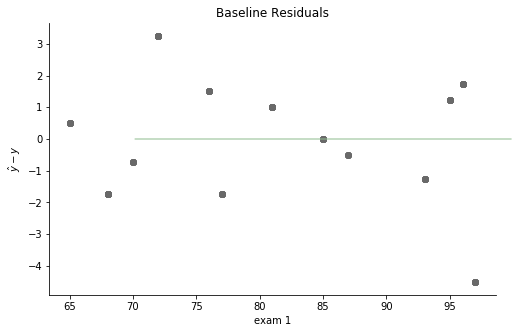

In [26]:
viz.evaluation_example5(eval, y, eval.exam_1_residual)

#### Exam 2 LM Residuals

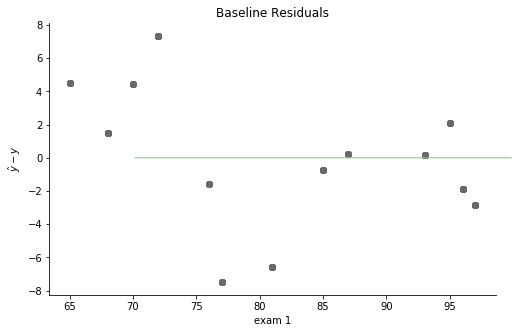

In [27]:
viz.evaluation_example5(eval, y, eval.exam_2_residual)

#### Exam 1 LM Actual vs. Predicted Y

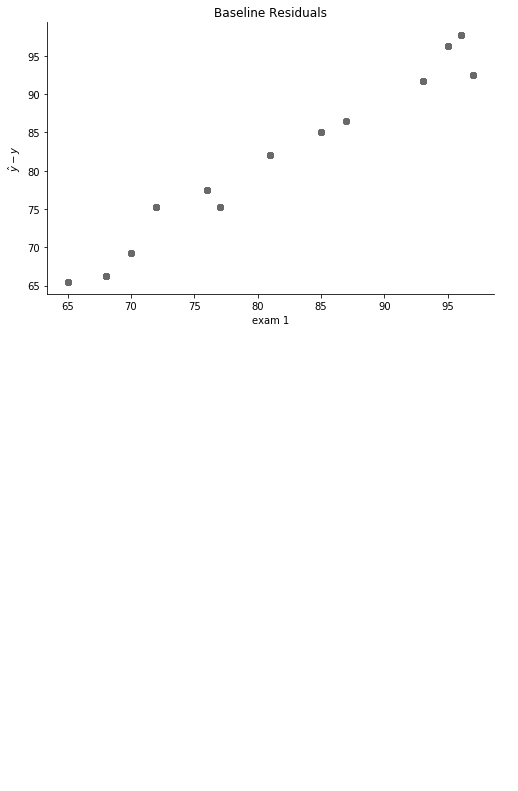

In [28]:
viz.evaluation_example5(eval, eval.y, eval.exam_1)

#### Exam 2 LM Actual vs. Predicted Y

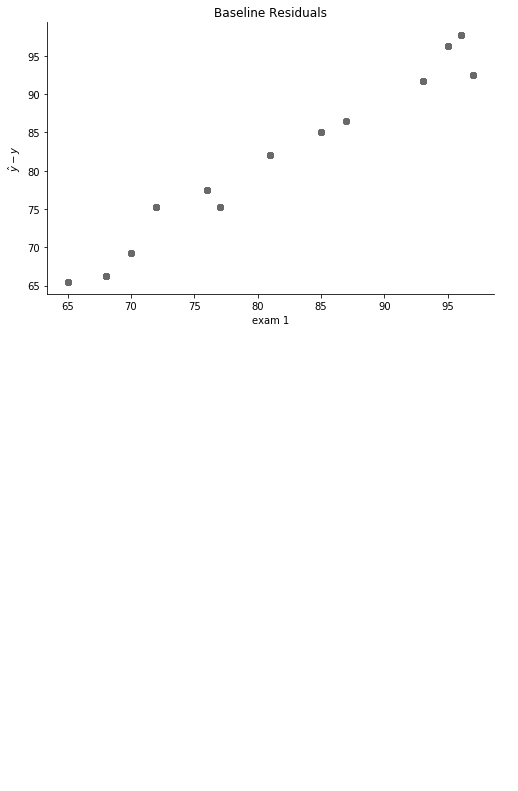

In [29]:
viz.evaluation_example5(eval, eval.y, eval.exam_2)

### Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

In [31]:
test.head()

,student_id,exam1,exam2,exam3,final_grade
24,25,57,65,75,65
42,43,83,80,86,85
81,82,83,80,86,85
72,73,73,70,75,76
92,93,98,93,96,95


In [33]:
X_test = test[['exam1', 'exam3']]
y_test = test['final_grade']

In [39]:
lm.predict(X_test)

array([66.58245528, 84.79017654, 84.79017654, 75.78779766, 96.37385765,
       82.19347368, 74.94789775, 86.2362116 , 92.33111973, 86.2362116 ,
       93.49718816, 86.2362116 , 74.94789775, 86.2362116 , 96.37385765,
       92.33111973, 93.49718816, 97.22915818, 70.64059382, 70.64059382,
       75.78779766])

In [40]:
test_pred = pd.DataFrame({
    'y': test.final_grade
})

In [44]:
test_pred['model_3_predictions'] = lm.predict(X_test)

In [45]:
test_pred.head()

,y,model_3_predictions
24,65,66.582455
42,85,84.790177
81,85,84.790177
72,76,75.787798
92,95,96.373858


In [46]:
mean_squared_error(test_pred.y, test_pred.model_3_predictions)

2.2096713057382296